In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
x = np.fromfile('luma.f32', 'float32')
fs = 8e6

In [7]:
fs/15734.25

508.4449528893973

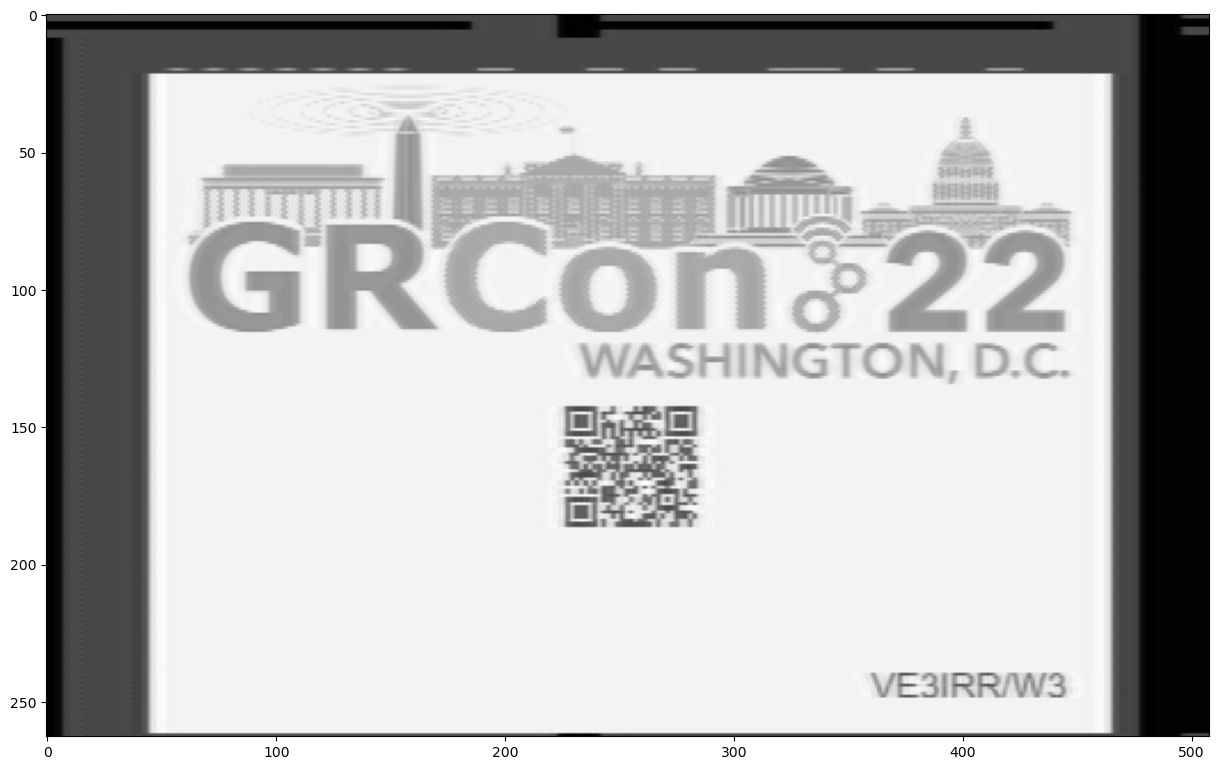

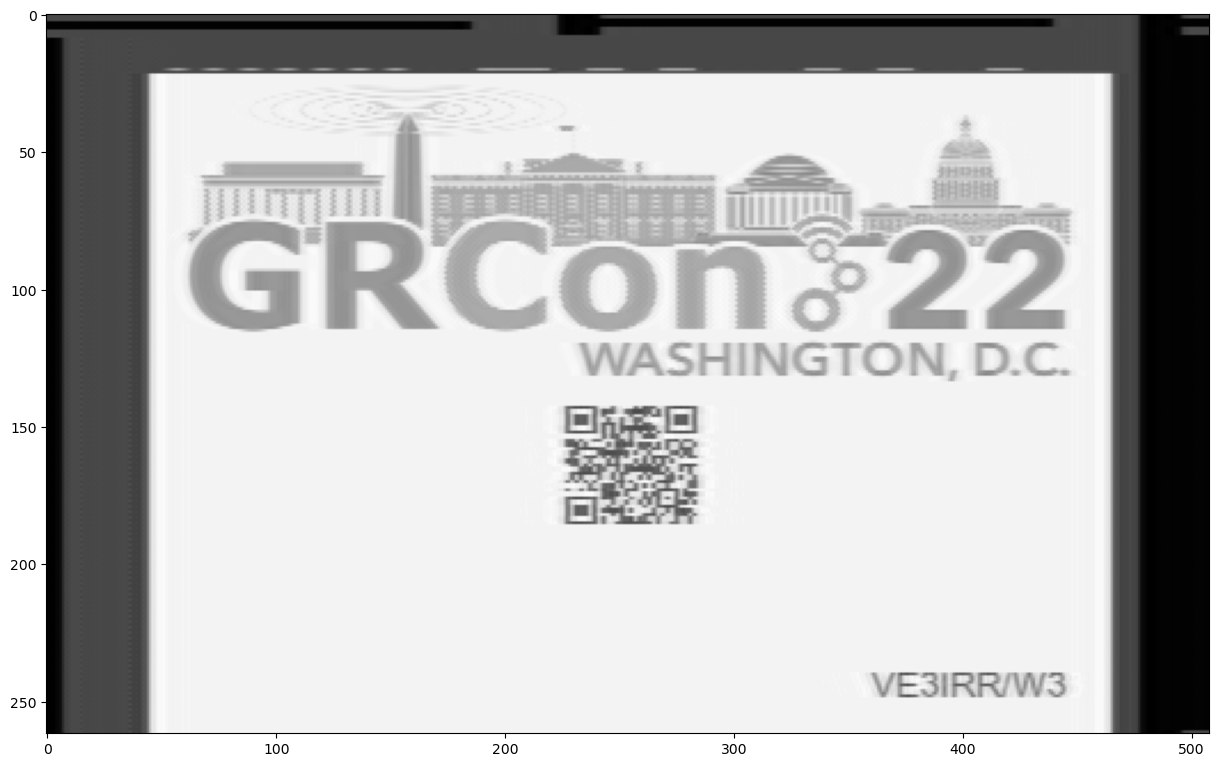

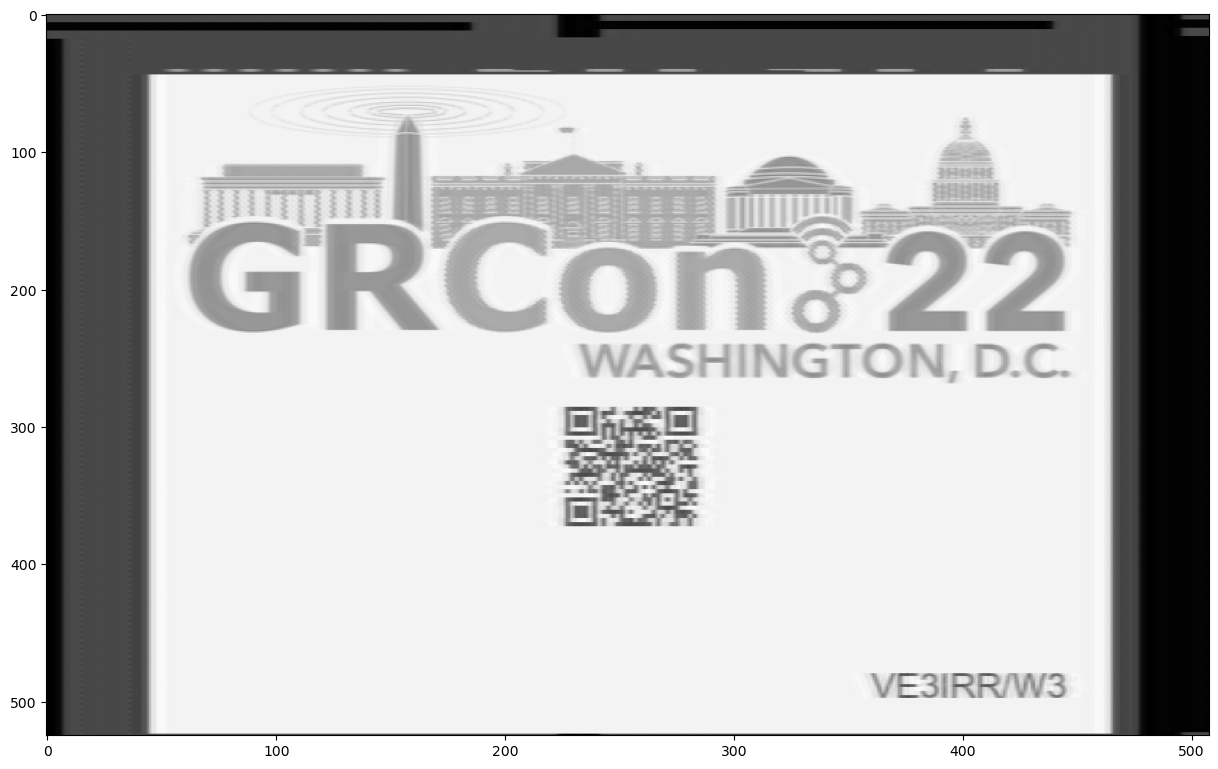

In [8]:
L = 508
N = L * 525
strips = np.zeros((len(range(120, x.size - N, N)), 2, L))
for num, offset in enumerate(range(120, x.size - N, N)):
    y = x[offset:][:N]
    z = 1-y[:y.size//L*L].reshape(-1, L)
    w = np.empty_like(z)
    a = w[::2].shape[0]
    w[::2] = z[:a]
    w[1::2] = z[a:]
    
    plt.figure(figsize=(15, 15))
    plt.imshow(z[:a], aspect=1.2, cmap='gray')
    
    plt.figure(figsize=(15, 15))
    plt.imshow(z[a:], aspect=1.2, cmap='gray')
    
    plt.figure(figsize=(15, 15))
    plt.imshow(w, aspect=0.6, cmap='gray')
    break

    im = Image.fromarray(np.round(255*w).astype('uint8'))
    im.save(f'{num:04d}.png')
    strips[num] = w[40:42]

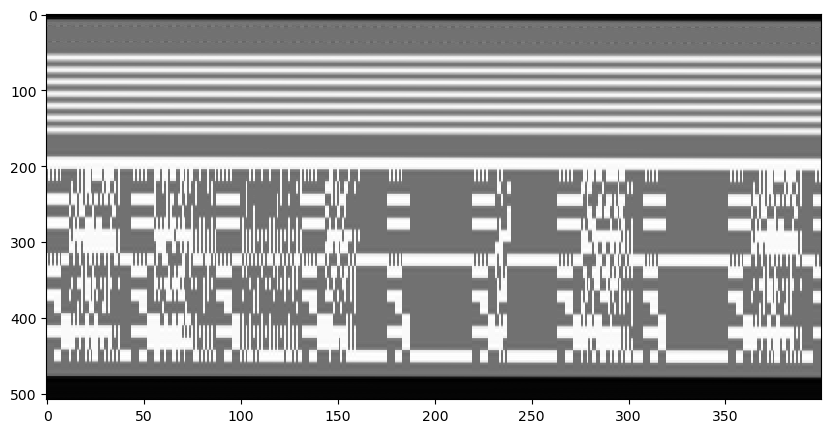

In [17]:
plt.figure(figsize=(10, 5))
plt.imshow(strips[:200].reshape(400, -1).T, aspect='auto', cmap='gray', interpolation='none')

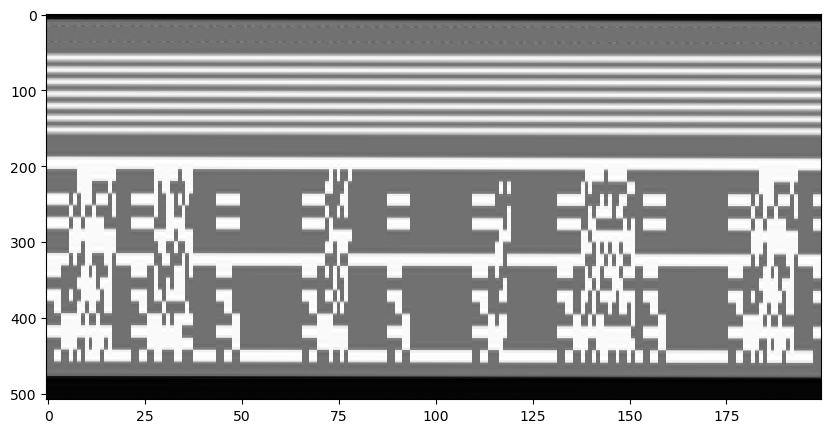

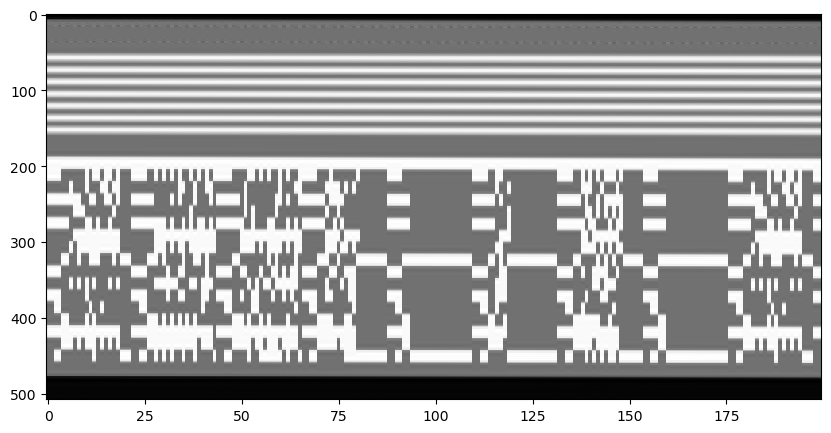

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(strips[:200, 0].T, aspect='auto', cmap='gray', interpolation='none')
plt.figure(figsize=(10, 5))
plt.imshow(strips[:200, 1].T, aspect='auto', cmap='gray', interpolation='none')

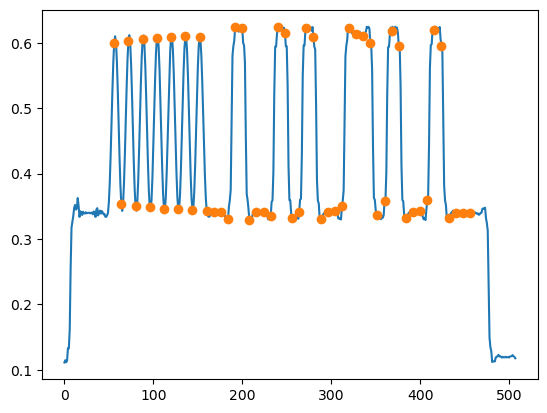

In [18]:
sample_cc = np.int32(np.arange(56, 458, 8))
plt.plot(strips[0, 0])
plt.plot(sample_cc, strips[0, 0, sample_cc], 'o')

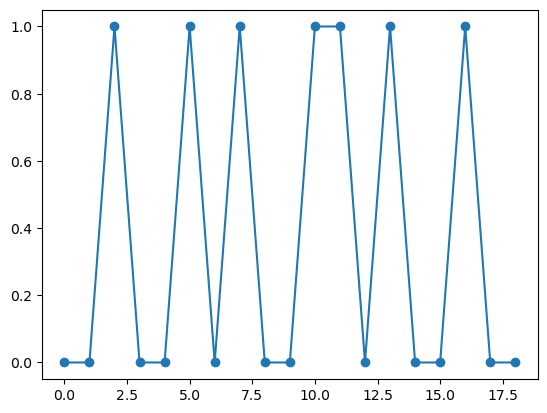

In [19]:
cc_bits = (np.average(strips[..., sample_cc][..., 13:].reshape(strips.shape[0], 2, -1, 2), axis=-1)
           >= 0.475).astype('uint8')
plt.plot(cc_bits[0, 0], 'o-')

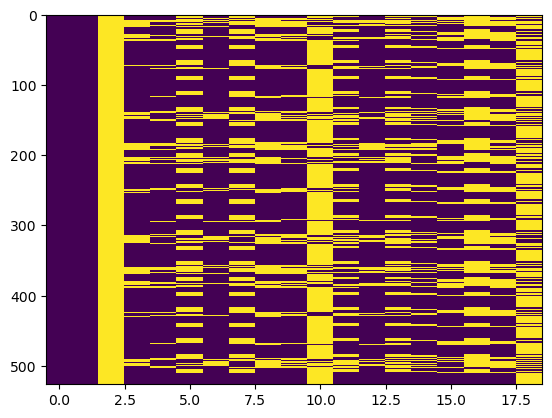

In [20]:
plt.imshow(cc_bits[:, 0], aspect='auto', interpolation='none')

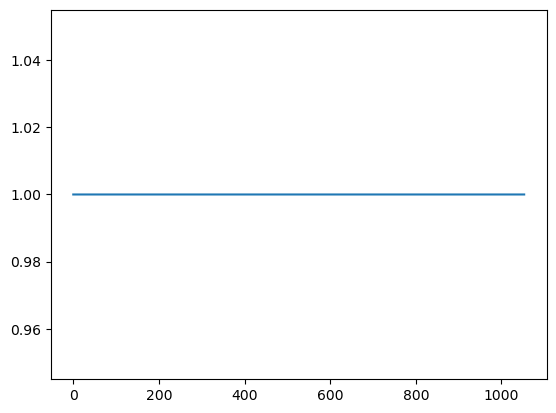

In [8]:
plt.plot((np.sum(cc_bits[:, 0, 3:].reshape(cc_bits.shape[0], 2, 8), axis=-1) % 2).ravel())

In [21]:
bytes(np.packbits(cc_bits[:, 0, 3:].reshape(cc_bits.shape[0], 2, 8)[..., ::-1], axis=-1) & 0x7f)

b'\x14%\x14%\x14-\x14-\x14p\x14phttps://www.youtube.com\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14p/watch?v=dQw4w9WgXcQ\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14pJust kidding!\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14pPart 6:\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14pflag[21-is-the-magic-number]\x00\x00\x00\x00\x14%\x14%\x14-\x14-\x14p\x14p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14%\x

In [22]:
bytes(np.packbits(cc_bits[:, 1, 3:].reshape(cc_bits.shape[0], 2, 8)[..., ::-1], axis=-1) & 0x7f)

b'\x15%\x15%\x15-\x15-\x14p\x14pFb, lbh svtherq bhg ubj gb\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14pqrpbqr gur bgure pybfrq pncgvba\x00\x15%\x15%\x15-\x15-\x14p\x14ppunaary, naq "qrpelcg" gur grkg\x00\x15%\x15%\x15-\x15-\x14p\x14pjvguva. Tbbq wbo!\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14pCneg 7:\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14psynt[pp3-sbe-gur-jva]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14pFb, lbh svtherq bhg ubj gb\x00\x00\x00\x00\x00\x00\x15%\x15%\x15-\x15-\x14p\x14pqrpbqr gur bgure pybfrq